In [2]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

In [3]:
x=np.array([20.89,20.11,16.41,18.95,21.43,16.54,11.55,14.39,20.66,15.31,9.34,11.39,11.34,10.07,5.95,4.59,8.74,9.96,3.03,3.17,4.45,4.06,0.16,1.52])
print(len(x))

24


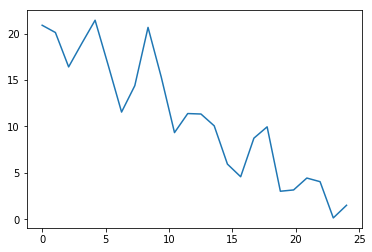

In [4]:
t=np.linspace(0,24,24)
plt.plot(t,x)
plt.show()

In [5]:
M = np.mean(x)
print(M)

11.000416666666666


In [6]:
D = np.var(x)
print(D)

43.182395659722225


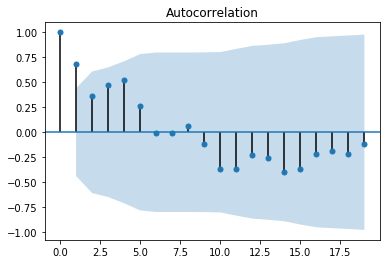

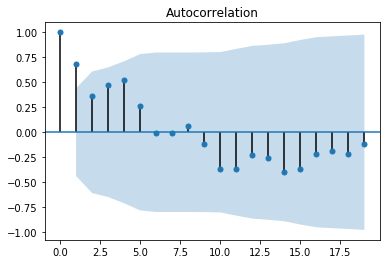

In [7]:
plot_acf(x[0:20])

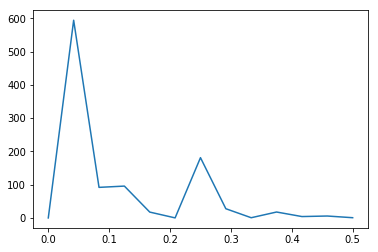

In [8]:
pds, pdden = signal.periodogram(x)
plt.plot(pds,pdden)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

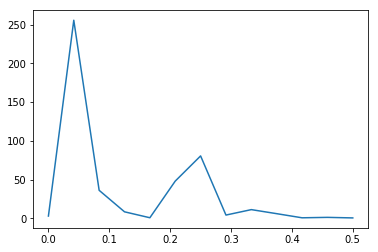

In [9]:
pdw, pddenw = signal.welch(x, nperseg = 24)
plt.plot(pdw,pddenw)
plt.show

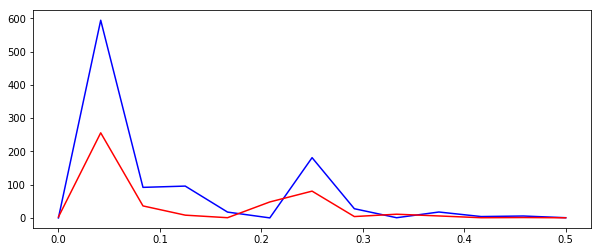

In [10]:
plt.figure(num="campare",figsize=(10,4))
plt.plot(pds,pdden,color="b")
plt.plot(pdw,pddenw,color="r")

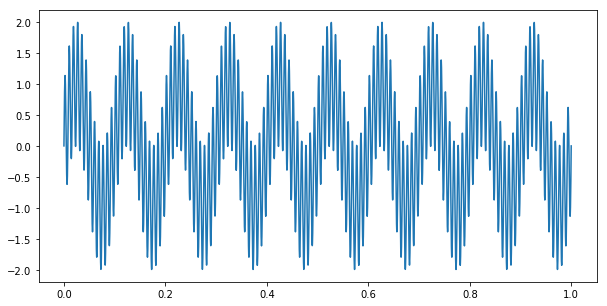

In [11]:
t = np.linspace(0, 1, 4096)
x1 = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*120*t)
plt.figure(figsize = (10, 5))
plt.plot(t, x1)

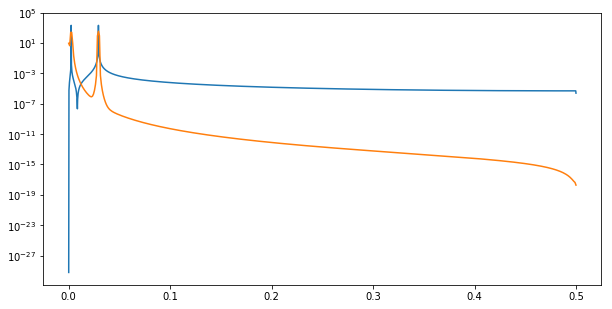

In [12]:
pd1, pdden1 = signal.periodogram(x1)
pdw1, pddenw1 = signal.welch(x1, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.semilogy(pdw1, pddenw1)

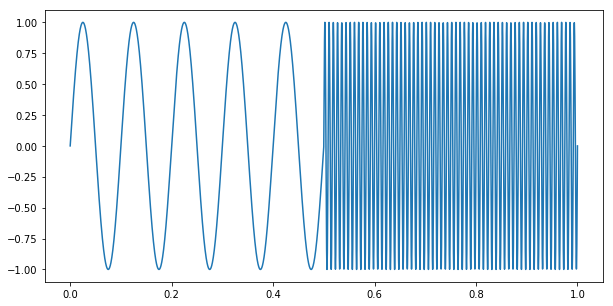

In [13]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
    x2[i] = np.sin(2*np.pi*10*t[i])
for i in range(len(t)//2, len(t)):
    x2[i] = np.sin(2*np.pi*120*t[i])
plt.figure(figsize = (10, 5))
plt.plot(t, x2)

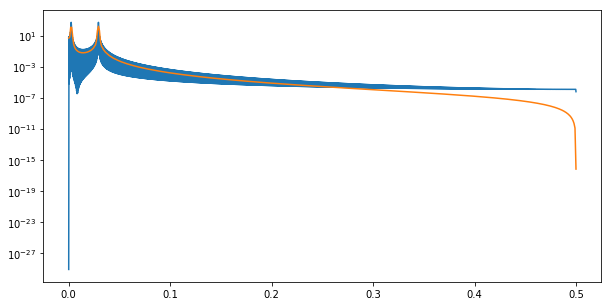

In [14]:
pd2, pdden2 = signal.periodogram(x2)
pdw2, pddenw2 = signal.welch(x2, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd2, pdden2)
plt.semilogy(pdw2, pddenw2)

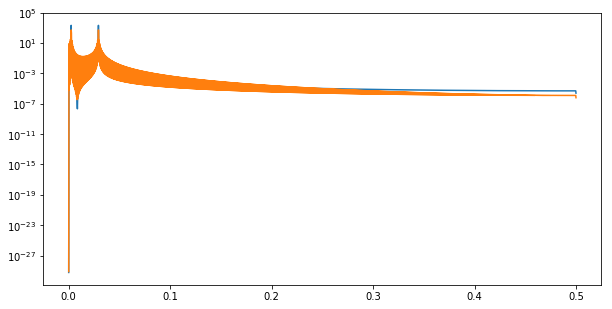

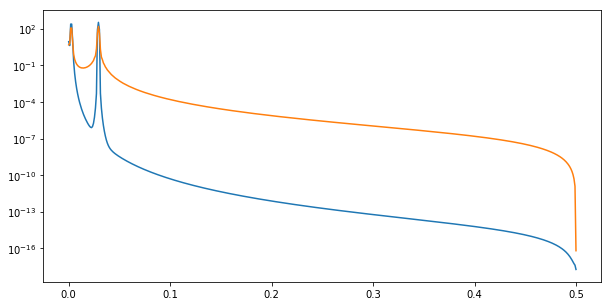

In [15]:
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.semilogy(pd2, pdden2)
plt.figure(figsize = (10, 5))
plt.semilogy(pdw1, pddenw1)
plt.semilogy(pdw2, pddenw2)

In [16]:
d=np.std(x)
d

6.571331346060875

In [17]:
k=[]
for i in range(1,24):
    k.append(abs(x[i]-x[i-1])/d)
print(k)

[0.1186974083216128, 0.5630518087050854, 0.38652745786781534, 0.3773968879969223, 0.7441414444778023, 0.7593590609292908, 0.43218030722228185, 0.9541445515083476, 0.8141424801546506, 0.9084917021538813, 0.3119611372555205, 0.007608808225744507, 0.19326372893390767, 0.6269657978013385, 0.2069595837402477, 0.6315310827367852, 0.18565492070816345, 1.0545808200881739, 0.021304663032084337, 0.19478549057905667, 0.0593487041608064, 0.5934870416080631, 0.20695958374024767]


In [57]:
s=[]
for i in range(0,23):
    if k[i]>(1.23/1.5):
        s.append(i)
print(np.array(s))
s=np.array(s)

[ 7  9 17]


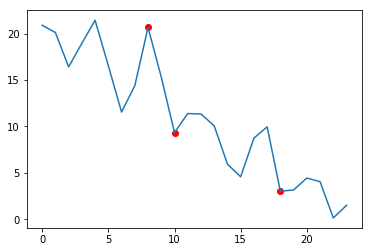

In [58]:
t=np.linspace(0,23,24)
plt.scatter(s+1,x[s+1],color="r")
plt.plot(t,x)
plt.show()

In [20]:
X=np.sort(x)
print(X)

[ 0.16  1.52  3.03  3.17  4.06  4.45  4.59  5.95  8.74  9.34  9.96 10.07
 11.34 11.39 11.55 14.39 15.31 16.41 16.54 18.95 20.11 20.66 20.89 21.43]


In [21]:
m=np.median(X)
print(m)

10.705


In [22]:
x=np.array([20.89,20.11,16.41,18.95,21.43,16.54,11.55,14.39,20.66,15.31,9.34,11.39,11.34,10.07,5.95,4.59,8.74,9.96,3.03,3.17,4.45,4.06,0.16,1.52])
tj=[]
for j in x:
    if j>m:
        tj.append(1)
    if j<m:
        tj.append(0)
print(tj)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [64]:
v=0
t=np.zeros([10],dtype=np.int32)
xx=0
for a in range(0,23):
    if tj[a]!=tj[a+1]:
        v+=1
        xx+=1
        t[xx]+=1
    else:
        t[xx]+=1
print("v=",v)        
tao=t.max()
print("tao=",tao)

v= 3
tao= 11


In [59]:
print(1.43*math.log(N+1))

4.602992429561526


In [61]:
import math
N=len(x)
if v>0.5*(N+2-1.96*np.sqrt(N-1))and tao<1.43*math.log(N+1):
    print('Run Test: the data is random.')
else:
    print('The null hypothesis of random data has been rejected')
    print(tj)
    

The null hypothesis of random data has been rejected
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [26]:
print(tsa.kpss(x))
p_value=tsa.kpss(x)[1]
if p_value>0.05:
    print("accept:data is stationary")
else:
    print("reject:data is non-stationary")

(0.39093338605175465, 0.08106319566734713, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
accept:data is stationary


In [31]:
print(stats.f_oneway(x[:(len(x)//2)], x[(len(x)//2):]))
pvalue=stats.f_oneway(x[:len(x)//2], x[len(x)//2:])[1]
print(pvalue)
if pvalue>0.05:
    print("accept:variance is the same")
else:
    print("reject:variance is not the same")

F_onewayResult(statistic=46.475767298127785, pvalue=7.541941276381926e-07)
7.541941276381926e-07
reject:variance is not the same


In [46]:
x1=x[:len(x)//2]
x2=x[len(x)//2:]
x11=np.mean(x1)
x22=np.mean(x2)
N1=len(x1)
N2=len(x2)
D1=np.var(x1)
D2=np.var(x2)
ks=((x11-x22)/np.sqrt((N1-1)*D1+(N2-1)*D2))*np.sqrt(N1*N2*(N1+N2-2)/(N1+N2))
print(ks)
a=0.2
t= stats.t.ppf(1-a, N1+N2-2)
if ks>t:
    print("the mean value is not constant,data is non-stationary.The null hypothesis has been rejected")
else:
    print("the mean value is constant,data is stationary.The null hypothesis has been accepted")

7.1204520258550295
the mean value is not constant,data is non-stationary.The null hypothesis has been rejected


In [45]:
print(stats.ttest_ind(x1, x2))

Ttest_indResult(statistic=6.817313789032139, pvalue=7.541941276381985e-07)
